### Carregando as Bases de Dados

In [42]:
# definindo as configurações

# autoreload permite a recarga dos módulos antes da execução dos códigos
# doc: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%reload_ext autoreload
%autoreload 2

# magic function do matplotlib para renderizar gráficos estáticos logo abaixo,
# no output do jupyter, fazendo a junção do backend do matplotlib com front-end
# do jupyter notebook
%matplotlib inline

# define o estilo
sns.set_style('white')

In [5]:
# importando a biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importando a base 'flights' do seaborn
flights = sns.load_dataset('flights')
print(flights.head())
print('_'*100,'\n')

# importando a base 'penguins' do seaborn

penguins = sns.load_dataset('penguins')
penguins.head()


   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
____________________________________________________________________________________________________ 



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# 1 - Como seria com plot do pandas?

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
____________________________________________________________________________________________________ 

GRÁFICO DE BARRAS...
AxesSubplot(0.125,0.125;0.775x0.755)


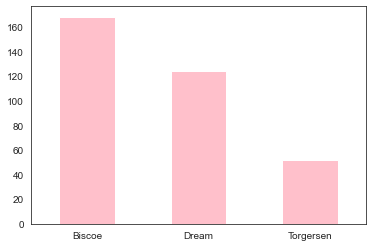

In [43]:
dados_bar = penguins['island'].value_counts()
print(dados_bar)
print('_'*100,'\n')
print('GRÁFICO DE BARRAS...')

grafico_bar = dados_bar.plot.bar(color='pink',rot = 0)

#grafico_bar = penguins['island'].value_counts().plot.bar(color='pink',rot = 0)

print (grafico_bar)

#plt.show()

# 1.1 - como seria com plot do matplotlib?

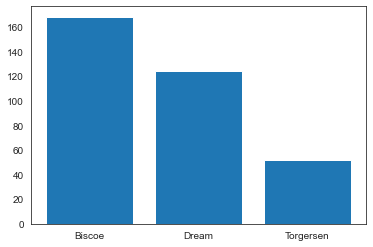

In [44]:


x_bar = penguins['island'].value_counts().index
y_bar = penguins['island'].value_counts().values
plt.bar(x_bar, y_bar)
plt.show()

# 1.2 - visualizando com o seaborn - countplot

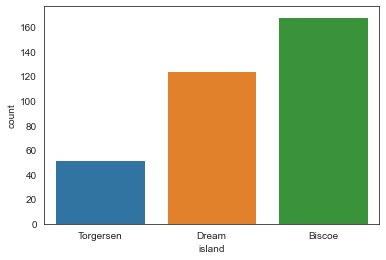

In [45]:
# penguins['island'].value_counts().index

sns.countplot(data=penguins, x='island', order=penguins['island'].value_counts(ascending=True).index)
plt.show()

# 2 - Qual a quantidade de pinguins por ilha e segmentado por sexo?

* 2.1 -Como seria com pandas plot?

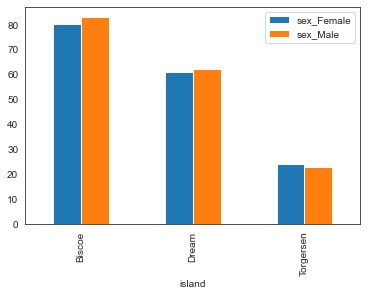

In [46]:
pd.get_dummies(penguins, columns=['sex']) \
    .groupby('island')[['sex_Female', 'sex_Male']] \
    .sum() \
    .plot(kind='bar')
    
plt.show()

* 2.2 - visualizando com o seaborn - countplot

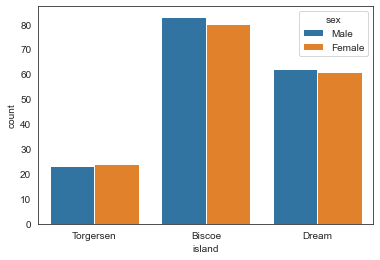

In [47]:
sns.countplot(data=penguins, x='island', hue='sex')
plt.show()

* 2.3 - Qual a média do comprimento da nadadeira por ilha, segmentado por espécie?

In [48]:
# mudando o estilo para darkgrid
sns.set_style('darkgrid')

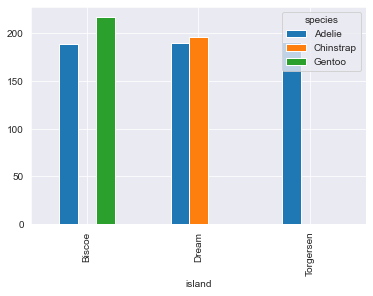

In [49]:
# utilizando o pandas plot

penguins.groupby(['island', 'species'])['flipper_length_mm'] \
    .mean() \
    .reset_index() \
    .pivot('island', 'species', 'flipper_length_mm') \
    .plot.bar()

plt.show()

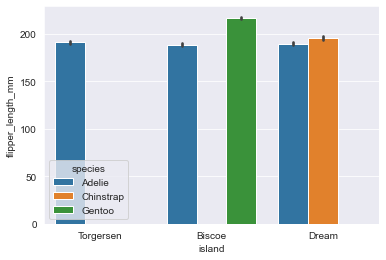

In [50]:
# utilizando o seaborn - barplot

sns.barplot(data=penguins, x='island', y='flipper_length_mm', hue='species')
plt.show()

# 3 - Adicionando título, rótulos de eixo, ajustando legenda e tamanho


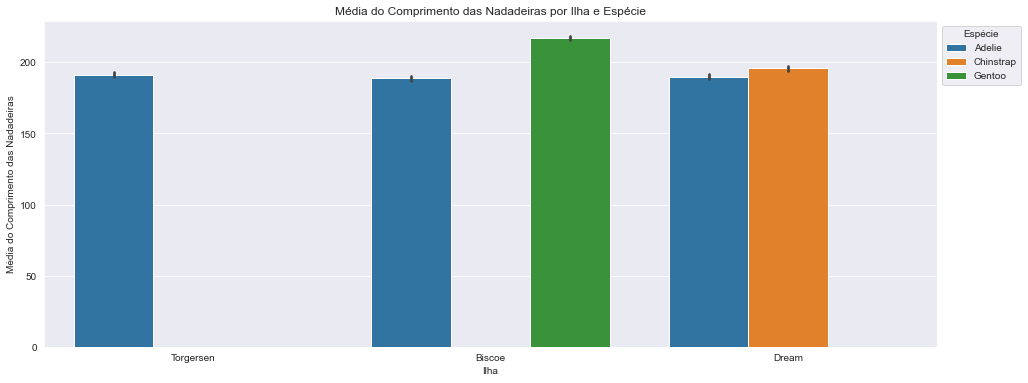

In [51]:
# adicionando título, rótulos de eixo, ajustando legenda e tamanho

plt.figure(figsize=(16,6))

# transformações e plot

sns.barplot(data=penguins, x='island', y='flipper_length_mm', hue='species')

# Estética
plt.title('Média do Comprimento das Nadadeiras por Ilha e Espécie')
plt.xlabel('Ilha')
plt.ylabel('Média do Comprimento das Nadadeiras')
plt.legend(title='Espécie', loc='upper left', bbox_to_anchor=(1, 1))

# show
plt.show()